# LAB 3 : Associative Networks 

Name : Girish Kumar Gupta

Roll Number : 211022002

Referrence Material : **Chapter 4, page no. 90-110, Artificial Neural Network by B. Yegnanarayana**


#**Problem 1** : Demonstrate the working principle of two layer auto-associative network. Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Effect of orthonormal, orthogonal, linearly independent and linearly dependent input vectors.
3. 3. Use all 3 learning rules (i.e. by computation, Widrow and Hebbian), to find the optimal weight and mention their pros. and cons.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2.  First do it using computation method for each set of data (i.e orthogonal, orthonormal, linearly independent and linearly dependent (not all only few) case ), then take the performance as reference, to implement using Widrow and Hebbian learning.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Objective 
To implement weights by Computation, weights by Widrow, and weights by Hebbian method for all type of inputs (i.e., Linearly independent, Linearly dependent, Orthonormal inputs).

##  Hypothesis
For auto-association input and output pattern are same.







## Programming : 
  Please write a program to demonstrate the same

In [ ]:
import numpy as np
from scipy.stats import ortho_group
import matplotlib.pyplot as plt

### Data generation

In [ ]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data
X1 = np.array([[1,2,3],[2,1,3],[3,2,1]])
X2 = np.array([[1,2,3],[2,4,6],[3,2,1]])
X3 = ortho_group.rvs(dim=3) ## generating orthonormal vector of dimension 3.

b1 = (np.array([1,3,9])*X1)
b2 = (np.array([1,3,9])*X2)
b3 = (np.array([1,3,9])*X3)

# b1 = X1 #(np.array([1,3,9])*X1)
# b2 = X2 #(np.array([1,3,9])*X2)
# b3 = X3 #(np.array([1,3,9])*X3)

print('\n ### Linearly independent inputs and outputs ### \n')
print('Inputs \n',X1,'\n Outputs \n',b1)

print('\n### Linearly dependent inputs and outputs ### \n')
print('Inputs \n',X2,'\n Outputs \n',b2)

print('\n### Orthonormal inputs and outputs ### \n')
print('Inputs \n',X3,'\n Outputs \n',b3)



 ### Linearly independent inputs and outputs ### 

Inputs 
 [[1 2 3]
 [2 1 3]
 [3 2 1]] 
 Outputs 
 [[ 1  6 27]
 [ 2  3 27]
 [ 3  6  9]]

### Linearly dependent inputs and outputs ### 

Inputs 
 [[1 2 3]
 [2 4 6]
 [3 2 1]] 
 Outputs 
 [[ 1  6 27]
 [ 2 12 54]
 [ 3  6  9]]

### Orthonormal inputs and outputs ### 

Inputs 
 [[-0.32514017  0.38954369  0.86170737]
 [-0.04499488  0.90381303 -0.42555549]
 [-0.9445948  -0.1771376  -0.27633845]] 
 Outputs 
 [[-0.32514017  1.16863106  7.75536631]
 [-0.04499488  2.71143908 -3.8299994 ]
 [-0.9445948  -0.53141281 -2.48704603]]


### By Computation
In weights by computation weights can be calculated as $W = BA^{-1}$. The minimum error can be calculated as $E_{min} = \frac{1}{L}||{B-WA}||^{2}_{2}$.


*   For linearly independent inputs, $A^{-1}$ exist so weights can be calculated as $W = BA^{-1}$ and $E_{min} = 0$. 
*   For linearly dependent inputs, $W = BA^{-1}$ does not exist so weights are calculated as $W = BA^{+}$, where $A^{+}$ is pseudoinverse of $A$ and hence $E_{min} \neq 0$.
*   For Orthonormal inputs, $W = BA^{T}$ as $AA^{T} = A^{T}A = I$ and $E_{min} = 0$.



In [ ]:
def weights_by_computation(A,B):

  ## Here A is input and B is output
  A_inv = np.linalg.pinv(A)
  weights =  np.dot(B,A_inv)## Write the weight equation here
  b_pred = weights@A
  error = (np.square(np.linalg.norm(B-b_pred)))*1/A.shape[1]## Mean Squared Error

  return weights,error

w1,e1 = weights_by_computation(X1,b1)
print('\n### Weights and Error for Linearly independent inputs ### \n')
print('weights : \n',np.round(w1,6))
print('\nError : ',np.round(e1,6))

w2,e2 = weights_by_computation(X2,b2)
print('\n### Weights and Error for Linearly dependent inputs ### \n')
print('weights : \n',np.round(w2,6))
print('\nError : ',np.round(e2,6))

w3,e3 = weights_by_computation(X3,b3)
print('\n### Weights and Error for Orthonormal inputs ### \n')
print('weights : \n',np.round(w3,6))
print('\nError : ',np.round(e3,6))


### Weights and Error for Linearly independent inputs ### 

weights : 
 [[ 5.333333  5.333333 -5.      ]
 [ 3.166667  7.666667 -5.5     ]
 [ 3.        0.       -0.      ]]

Error :  0.0

### Weights and Error for Linearly dependent inputs ### 

weights : 
 [[ 1.866667  3.733333 -3.666667]
 [ 3.733333  7.466667 -7.333333]
 [ 0.6       1.2       0.      ]]

Error :  71.111111

### Weights and Error for Orthonormal inputs ### 

weights : 
 [[ 7.243805 -2.229485 -2.042989]
 [-2.229485  4.082536  0.62058 ]
 [-2.042989  0.62058   1.673659]]

Error :  0.0


### By Widrow's Learning rule
In Widrow's method we update the weights recursively to minimise the mean square error between true and predicted output $E_{min} = \frac{1}{L}||{B-B^{'}}||^{2}_{2}$.

Approximated weight update equation is $W(l) = W(l−1) + η(b_{l} − W(l − 1)
a_{l})a_{l}^{T}$.




### Weights and Error for Linearly independent inputs ### 

weights : 
 [[ 5.333446e+00  5.333199e+00 -4.999974e+00]
 [ 3.167041e+00  7.666222e+00 -5.499912e+00]
 [ 2.999845e+00  1.840000e-04 -3.600000e-05]]

Error :  0.0


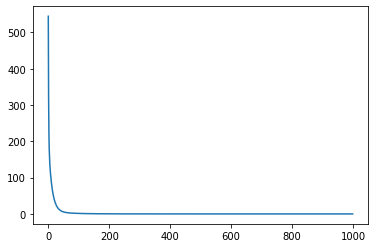


### Weights and Error for Linearly dependent inputs ### 

weights : 
 [[ 1.866667  3.733333 -3.666667]
 [ 3.733333  7.466667 -7.333333]
 [ 0.6       1.2       0.      ]]

Error :  71.111111


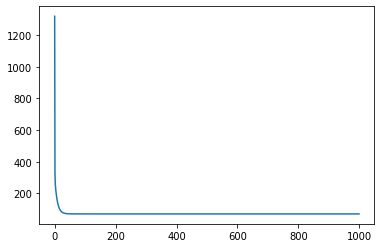


### Weights and Error for Orthonormal inputs ### 

weights : 
 [[ 7.243493 -2.229389 -2.0429  ]
 [-2.229389  4.08236   0.620553]
 [-2.0429    0.620553  1.673587]]

Error :  0.0


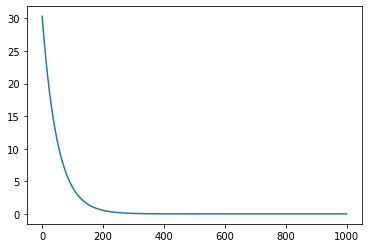

In [ ]:
def weights_by_widrow(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  # weights_init = 0.01*np.ones((B.shape[0],A.shape[0])) ## Initialise weights here
  weights_init = np.zeros((B.shape[0],A.shape[0]))
  # A_inv = np.linalg.pinv(A)
  weights = weights_init
  error = []
  for epoch in range(num_epochs):
    ## Write the widrow learning training loop here
    b_pred = weights@A
    err = B-b_pred
    weights = weights+learning_rate*(err@A.T)
    error.append((np.square(np.linalg.norm(B-b_pred)))*1/A.shape[1])

  return weights,error

epoch = 1000
lr = 0.01
x = np.arange(epoch)
w1,e1 = weights_by_widrow(X1,b1,epoch,lr)
print('\n### Weights and Error for Linearly independent inputs ### \n')
print('weights : \n',np.round(w1,6))
print('\nError : ',np.round(e1[-1],6))
plt.figure()
plt.plot(x,e1)
plt.show() 

w2,e2 = weights_by_widrow(X2,b2,epoch,lr)
print('\n### Weights and Error for Linearly dependent inputs ### \n')
print('weights : \n',np.round(w2,6))
print('\nError : ',np.round(e2[-1],6))
plt.figure()
plt.plot(x,e2)
plt.show() 

w3,e3 = weights_by_widrow(X3,b3,epoch,lr)
print('\n### Weights and Error for Orthonormal inputs ### \n')
print('weights : \n',np.round(w3,6))
print('\nError : ',np.round(e3[-1],6))
plt.figure()
plt.plot(x,e3)
plt.show()

### By Hebbian Learning rule
In Hebbian rule we update weights considering one pair of input and output at a time. Each pair of input and output are visited just once i.e., updates are done untill each input output pair is visited.
The update equation is given as: $W(l) = W(l − 1) + b_{l}a_{l}^{T}$, here learning rate is kept $1$.

This can learn weights for orthonormal inputs only.

Verification:

*   $b = Wa_{k} = ∑_{l=1}^{L}b_{l}a^{T}_{l}a_{k} = b_{k}a^{T}_{k}a_{k}+∑_{l\neq k}b_{l}a_{l}^{T}a_{k}$
*   For orthonormal inputs $a^{T}_{l}a_{k}=1$ for $l=k$ ; and $a^{T}_{l}a_{k}=0$ for $l\neq k$. Hence correctly learns the weights.
*   If not orthogonal then $b_{k}^{'}=b_{k}+ϵ$. There will be an error $ϵ$. Hence, not able to predict exact output.


### Weights and Error for Linearly independent inputs ### 

weights : 
 [[94.01 89.01 42.01]
 [89.01 88.01 39.01]
 [42.01 39.01 30.01]]

Error :  433843.784333


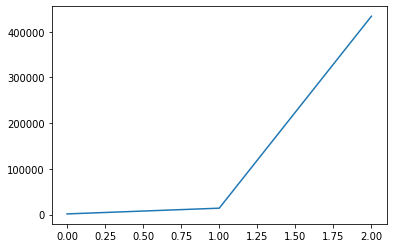


### Weights and Error for Linearly dependent inputs ### 

weights : 
 [[ 94.01 188.01  42.01]
 [188.01 376.01  84.01]
 [ 42.01  84.01  30.01]]

Error :  5947785.193333


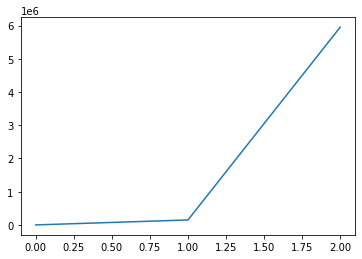


### Weights and Error for Orthonormal inputs ### 

weights : 
 [[ 7.253805 -2.219485 -2.032989]
 [-2.219485  4.092536  0.63058 ]
 [-2.032989  0.63058   1.683659]]

Error :  0.0003


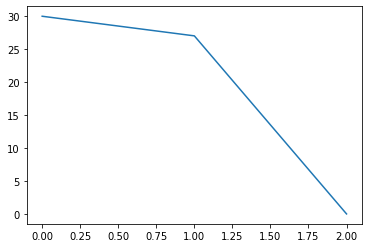

In [ ]:
def weights_by_hebbian(A,B,num_epochs,learning_rate):

  ## Here A is input and B is output
  weights_init = 0.01*np.ones((B.shape[0],A.shape[0])) ## Initialise weights here
  weights = weights_init
  error = []
  # for epoch in range(num_epochs):
  for i in range(A.shape[1]):
    ## Write the widrow learning training loop here
    input=np.matrix(A[:,i]).T
    d_op=np.matrix(B[:,i]).T

    del_weights = learning_rate*(d_op@input.T)
    weights = weights+del_weights

    err= B-weights@A
    error.append((np.square(np.linalg.norm(err)))*1/A.shape[1])

  return weights,error

epoch = 1000
lr = 1
x = np.arange(epoch)
w1,e1 = weights_by_hebbian(X1,b1,epoch,lr)
print('\n### Weights and Error for Linearly independent inputs ### \n')
print('weights : \n',np.round(w1,6))
print('\nError : ',np.round(e1[-1],6))
plt.figure()
plt.plot(np.arange(3),e1)
plt.show() 

w2,e2 = weights_by_hebbian(X2,b2,epoch,lr)
print('\n### Weights and Error for Linearly dependent inputs ### \n')
print('weights : \n',np.round(w2,6))
print('\nError : ',np.round(e2[-1],6))
plt.figure()
plt.plot(np.arange(3),e2)
plt.show() 

w3,e3 = weights_by_hebbian(X3,b3,epoch,lr)
print('\n### Weights and Error for Orthonormal inputs ### \n')
print('weights : \n',np.round(w3,6))
print('\nError : ',np.round(e3[-1],6))
plt.figure()
plt.plot(np.arange(3),e3)
plt.show() 
 

## Inferences and Conclusion : State all the key observations and conclusion

## Results

\begin{array}{|c|c|c|}\hline\
  \textbf{Learning Algorithm} & \textbf{Linearly Independent} & \textbf{Linearly Dependent} & \textbf{Orthonornmal}  \\ \hline\
  \textbf{Weights by Computation} & \text{Successfully learns weights}& \text{Has error} & \text{Successfully learns weights}   \\ \hline\
  \textbf{Weights by Widrow} & \text{Successfully learns weights} & \text{Has error} & \text{Successfully learns weights}   \\ \hline\
  \textbf{Weights by Hebbian} & \text{Has error} & \text{Has error} & \text{Successfully learns weights}   \\ \hline
  \end{array}

# **Problem 2** : Demonstrate the working principle of two layer associative network performing heteroassociation task (i.e each input output pair is related with different functional relations).

Observation to be demonstrated are:
1. Limitation of no. of patterns to input dimensionality.
2. Overcome the limitation by modifying the task to a pattern classification task.
3. Use computation and Widrow’s learning law to demonstrate the same.

Hints:

1. Generate data such that each input output data points have different functional
relation.
2. First do it using computation method , then take the performance as reference, to
implement using Widrow learning.
3. Modify the data and network element such that the network will overcome the
limitation of limitation of no. of data points with the input dimensionality, and
perform pattern classification task.

##Write down the Objectives, Hypothesis and Experimental description for the above problem



## Objective 
To implement Hetro-association task with weights by Computation and weights by Widrow method, for different case

*   For $M>L$
*   For $M<L$
for this case it is not able to learn weights so we have to convert pattern association task to pattern classification task.



##  Hypothesis
For auto-association input and output pattern are different.





## Programming : 
  Please write a program to demonstrate the same

### Data generation

In [ ]:
## Write your code here to Generate the Data
## Important Parameters to generate data are : Number of Datapoints, Dimension of Data
M, L = 100,70
Input = np.random.rand(M,1)
r = 1 #matrix rank
while r < L:
  t = np.random.rand(M,1)
  if np.linalg.matrix_rank(np.hstack([Input,t])) > r:
    Input = np.hstack([Input,t])
    r+=1

data =  Input
N = 10
b = np.zeros((N,L))
for i in range(L):
  a = np.random.randint(10, size=1)
  b[0:N,i] = data[0:N,i]*a

print(data.shape)
print(b.shape)

(100, 70)
(10, 70)


### For $M>L$
For this condition the inputs are linearly independent (i.e., input is full rank matrix) so weights can be learned by both weights by Computation and weights by Widrow method with error as $0$.

The error can be calculated as $E_{min}=\frac{1}{L}tr(B(I-A^{+}A)B^{T})$

Hence we have $A^{+}A≃I$ for $M>L$ and $E_{min}=0.$




### Error for Weights by Computation ### 

weights : 
 (10, 100)

Error :  8.349459574127954e-28


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in matmul
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]



### Error for Weights by Widrow with learning rate =  0.1  ### 

weights : 
 (10, 100)

Error :  nan


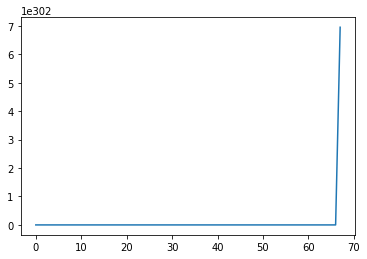

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]



### Error for Weights by Widrow with learning rate =  0.01  ### 

weights : 
 (10, 100)

Error :  nan


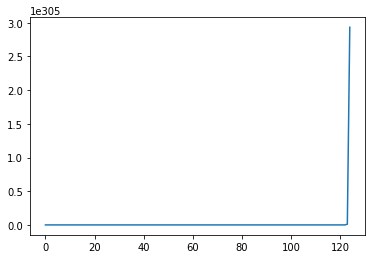


### Error for Weights by Widrow with learning rate =  0.001  ### 

weights : 
 (10, 100)

Error :  2.2740570529772302e-10


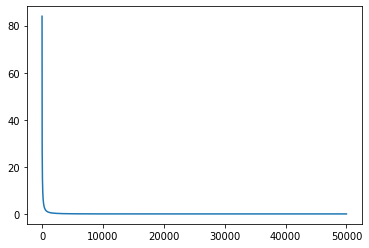


### Error for Weights by Widrow with learning rate =  0.0007  ### 

weights : 
 (10, 100)

Error :  1.4091200848635334e-07


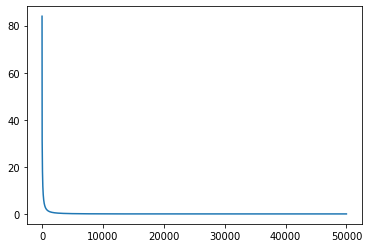


### Error for Weights by Widrow with learning rate =  1e-05  ### 

weights : 
 (10, 100)

Error :  1.9735127756099673


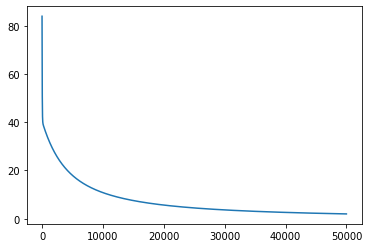

In [ ]:
## You can use the same function defined above for computation method and widrow's learning law
epoch = 50000
lr = [0.1,0.01,0.001,0.0007,0.00001]
x = np.arange(epoch)

wc,ec = weights_by_computation(data,b)
print('\n### Error for Weights by Computation ### \n')
print('weights : \n',wc.shape)
print('\nError : ',ec)

for learning_rate in lr:
  ww,ew = weights_by_widrow(data,b,epoch,learning_rate)
  print('\n### Error for Weights by Widrow with learning rate = ',learning_rate,' ### \n')
  print('weights : \n',ww.shape)
  print('\nError : ',ew[-1])
  plt.figure()
  plt.plot(x,ew)
  plt.show()

### For $M<L$
For this condition the inputs are linearly dependent so both methods fails to learn the weights hence we get error here.

The error can be calculated as $E_{min}=\frac{1}{L}tr(B(I-A^{+}A)B^{T})$

Hence we have $A^{+}A \neq I$ for $M<L$ and $E_{min}\neq 0.$



In [ ]:
input = data[0:10,]
print(input.shape)
print(b.shape)

(10, 70)
(10, 70)



### Error for Weights by Computation ### 

weights : 
 (10, 10)

Error :  20.017306

### Error for Weights by Widrow with learning rate =  0.1  ### 

weights : 
 (10, 10)

Error :  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in add
  del sys.path[0]


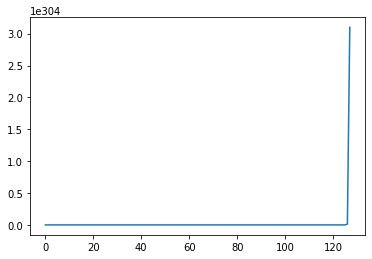


### Error for Weights by Widrow with learning rate =  0.01  ### 

weights : 
 (10, 10)

Error :  20.017306


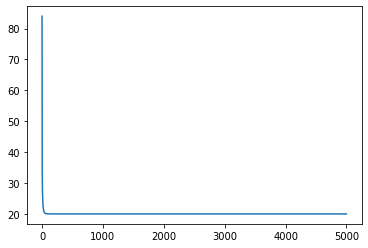


### Error for Weights by Widrow with learning rate =  0.001  ### 

weights : 
 (10, 10)

Error :  20.017306


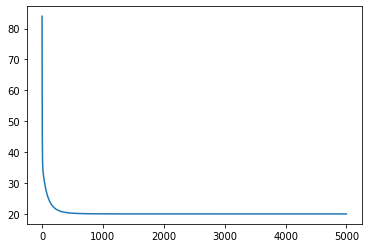


### Error for Weights by Widrow with learning rate =  0.0007  ### 

weights : 
 (10, 10)

Error :  20.017306


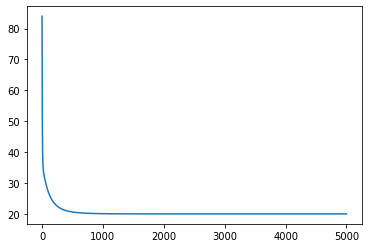


### Error for Weights by Widrow with learning rate =  1e-05  ### 

weights : 
 (10, 10)

Error :  29.14511


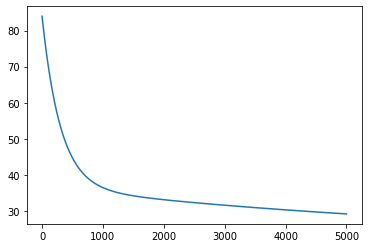

In [ ]:
## You can use the same function defined above for computation method and widrow's learning law
epoch = 5000
lr = [0.1,0.01,0.001,0.0007,0.00001]
x = np.arange(epoch)

wc,ec = weights_by_computation(input,b)
print('\n### Error for Weights by Computation ### \n')
print('weights : \n',wc.shape)
print('\nError : ',np.round(ec,6))

for learning_rate in lr:
  ww,ew = weights_by_widrow(input,b,epoch,learning_rate)
  print('\n### Error for Weights by Widrow with learning rate = ',learning_rate,' ### \n')
  print('weights : \n',ww.shape)
  print('\nError : ',np.round(ew[-1],6))
  plt.figure()
  plt.plot(x,ew)
  plt.show()

### Converting Pattern Association Task to Pattern Classification Task
For converting the pattern association task to pattern classification we follow this steps:

*   First for visualisation we reduce dimension of input to $2$ usin PCA.
*   Then using proper thresholding we divide inputs to two classes
*   Then using Perceptron learning algorithm we learns the weights to separate both classes.

0.056618128643765364
[[0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 0.
  1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
  0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.]]
(70, 2)
(70, 1)


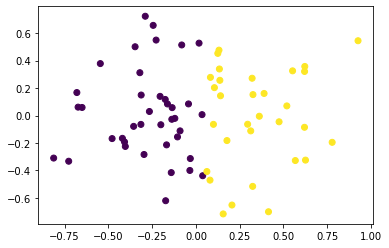

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_red = pca.fit_transform(input.T)
# x.shape
thres = (np.max(x_red[:,0])+np.min(x_red[:,0]))/2
y = np.zeros((x_red.shape[0],1))
for i in range(x_red.shape[0]):
  if x_red[i,0]<thres:
    y[i] = 0
  else:
    y[i] = 1

print(thres)    
print(y.T)
print(x_red.shape)
print(y.shape)

plt.scatter(x_red[:,0],x_red[:,1],c =y)
plt.show()

(70, 3)
[[-0.02      ]
 [ 0.39897174]
 [-0.01039783]]
0.0


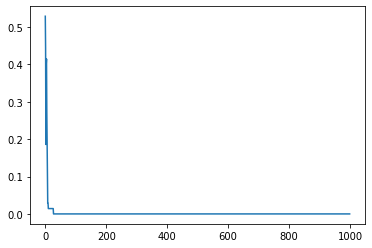

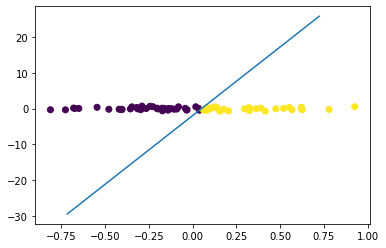

In [ ]:
z = np.ones((x_red.shape[0],1))
data_aug = np.concatenate((z,x_red),axis=1)
print(data_aug.shape)


epoch = 1000
lr = 0.01
weights_init = 0.01*np.ones((data_aug.shape[1],1))
weights = weights_init
error = []
for i in range(epoch):
  y_pred = np.zeros((y.shape))
  y_pred[np.where(data_aug@weights>0)]=1
  err = y-y_pred
  del_weights = lr*(data_aug.T@err)
  weights += del_weights
  error.append(np.square(np.linalg.norm(err))/data_aug.shape[0])

print(weights)
print(error[-1])
plt.plot(error)

x_dc=np.linspace(np.min(x_red[:,1]),np.max(x_red[:,1]),100)
leq1=((-weights[0]-(weights[1]*x_dc))/(weights[2]))
plt.figure()
plt.scatter(x_red[:,0],x_red[:,1],c =y_pred)
plt.plot(x_dc,leq1)
plt.show()


## Inferences and Conclusion : State all the key observations and conclusion

## Results

Error calculated by Widrow method

  \begin{array}{|c|c|}\hline\
  \textbf{Learning Rate} & \textbf{M>L} & \textbf{M<L}   \\ \hline\
  0.1& NaN & NaN  \\ \hline\
  0.01 & NaN & 20.62515    \\ \hline\
  0.001 & 0.0 & 20.62515   \\ \hline\
  0.0001 & 0.0 & 20.62515    \\ \hline\
  0.00001 & 2.8523 & 29.55535    \\ \hline
  \end{array}


Error calculated by Computation method  

*   For $M>L : $  $8.28528301236859e-28 ≃ 0.0$
*   For $M<L : $  $20.62515$

Error calculated after converting to Pattern classification task : $0.0$

